--- 
title: "ISLR Chp 2 - Python"  
date: 2019-08-05
description: "Python implementation of the code in ISLR" 
draft: false 
tags:
- python
---

In [92]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import plotly.express as px

# Advertising

Simple example of advertising spend in tv/radio/newspapers and sales for 200 markets.

In [27]:
df = pd.read_csv("../data/Advertising.csv")
df = df.rename(columns={df.columns[0]: "Markets"})

df.head(2)

,Markets,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


Lets take a look at the each of the advertising budgets with a simple regression line plotted:

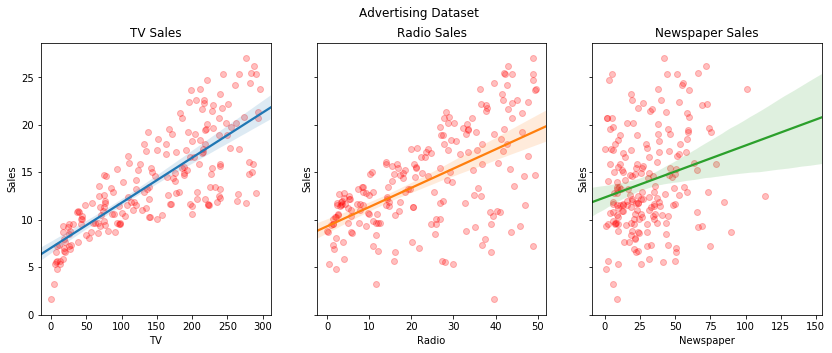

In [41]:
fig, axes = plt.subplots(1,3, figsize=(14,5), sharey=True)
fig.suptitle("Advertising Dataset")

for ax, col in zip(axes, df.columns[1:4]):
    ax.set_title(f"{col} Sales")
    sns.regplot(x=col, y="Sales", order=1, data=df, ax=ax, 
                scatter_kws={'alpha':0.25, "color": "red"})

# Income dataset

In [90]:
df = pd.read_csv("../data/Income1.csv")
df.head(3)

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410


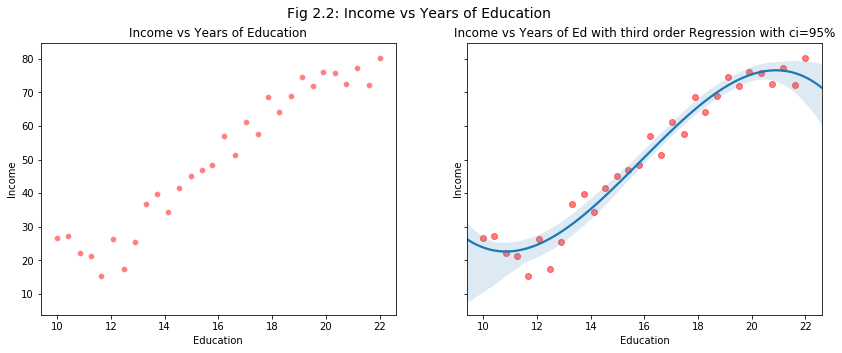

In [84]:
fig, (ax, ax1) = plt.subplots(1,2, figsize=(14,5), sharey=True)
fig.suptitle("Fig 2.2: Income vs Years of Education", size=14)

ax.set_title("Income vs Years of Education")
sns.scatterplot(x="Education", y="Income", data=df, ax=ax,
                color="red", alpha=0.5)

ax1.set_title("Income vs Years of Ed with third order Regression with ci=95%")

sns.regplot(x="Education", y="Income", order=3, ci=95, data=df, ax=ax1, 
            scatter_kws={'alpha':0.5, "color": "red"});

Each actual point is either above or below the predicted income value based on our regression line, but the cumalative error should be approx zero.

## Fig 2.3

In [97]:
df = pd.read_csv("../data/Income2.csv")
df.head(3)

,Unnamed: 0,Education,Seniority,Income
0,1,21.586207,113.103448,99.917173
1,2,18.275862,119.310345,92.579135
2,3,12.068966,100.689655,34.678727


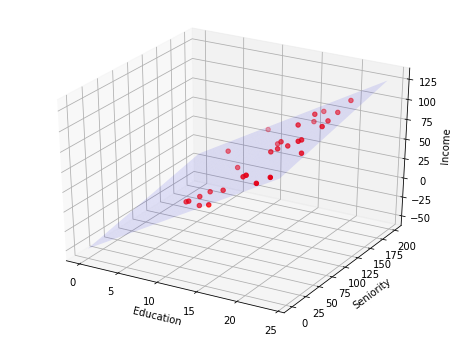

In [280]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

reg = linear_model.LinearRegression()

xs = df.Education
ys = df.Seniority
zs = df.Income

data = np.column_stack((xs, ys))
reg.fit(data, y=zs)

# we need a mesh for every possible income point we predict
X, Y = np.meshgrid(np.arange(0,25), np.arange(0,200), indexing='xy')

Z = X * reg.coef_[0] + Y * reg.coef_[1] + reg.intercept_

# plot 
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X,Y, Z, alpha=0.1, color="blue")

ax.set_xlabel("Education")
ax.set_ylabel("Seniority")
ax.set_zlabel("Income")

ax.scatter(xs, ys, zs, color="red");

todo: make higher order regression plane

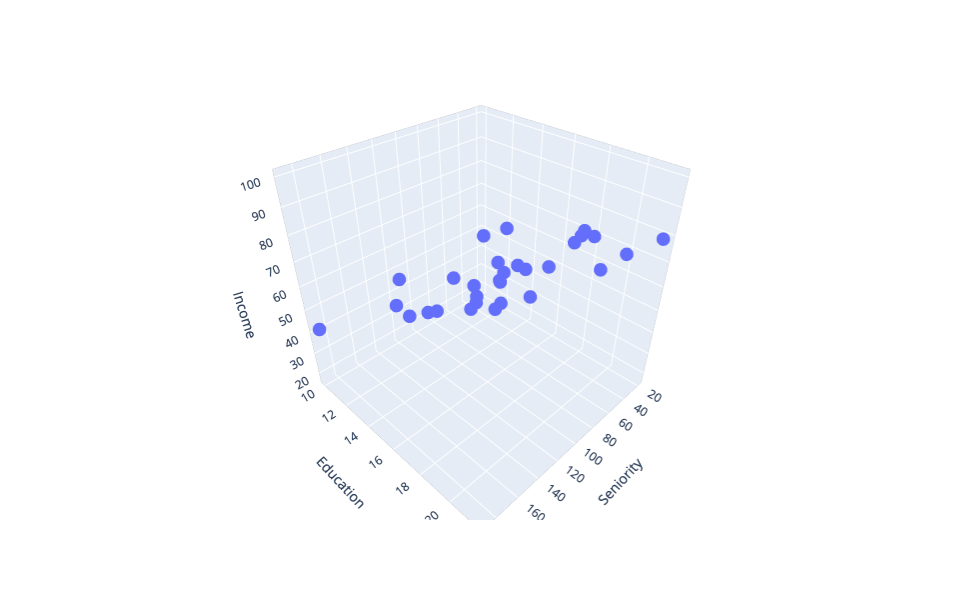

In [289]:
px.scatter_3d(df, y="Education", x="Seniority", z="Income")

## Clustering

The below chart shows us how clusters with three types of things with two features each can look:

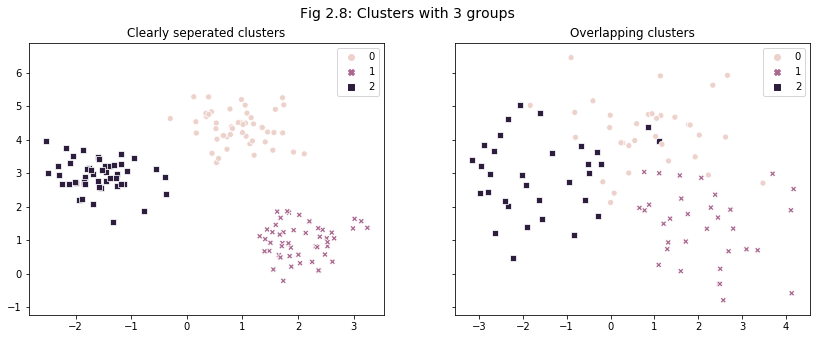

In [348]:
from sklearn.datasets.samples_generator import make_blobs

fig, (ax, ax1) = plt.subplots(1,2, figsize=(14,5), sharey=True)
fig.suptitle("Fig 2.8: Clusters with 3 groups", size=14)

ax.set_title("Clearly seperated clusters")
X, color = make_blobs(n_samples=150, centers=3, n_features=2, cluster_std=0.5, random_state=0)
sns.scatterplot(X[:,0], X[:,1], hue=color, style=color, ax=ax)

ax1.set_title("Overlapping clusters")
X, color = make_blobs(n_samples=100, centers=3, n_features=2, cluster_std=1.1, random_state=0)
sns.scatterplot(X[:,0], X[:,1], hue=color, style=color, ax=ax1);

## Model Accuracy

No one method dominates, so we need to compare model accuracy.

### measuring quality of fit

For regression models, the most common measure is the MSE.

Text(0.5, 1.0, 'Mean Square Error')

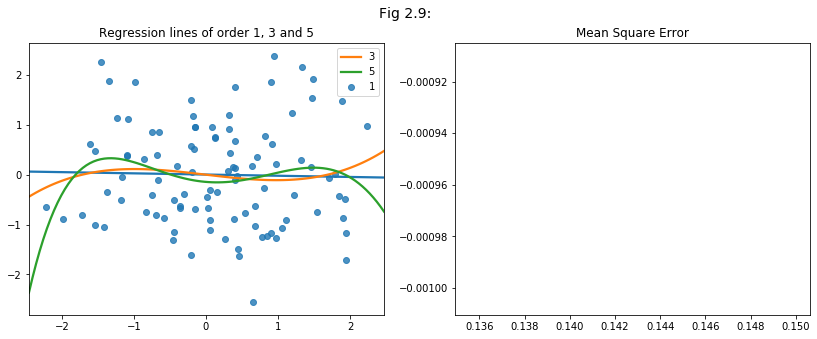

In [628]:
from sklearn.datasets.samples_generator import make_regression

fig, (ax, ax1) = plt.subplots(1,2, figsize=(14,5))
fig.suptitle("Fig 2.9: ", size=14)

X, y = make_regression(n_features=2, random_state=0, n_informative=3)

ax.set_title("Regression lines of order 1, 3 and 5")
sns.regplot(X[:,0], X[:,1], order=1, ax=ax, ci=0, label="1")
sns.regplot(X[:,0], X[:,1], order=3, ax=ax, scatter=False, ci=0, label="3")
sns.regplot(X[:,0], X[:,1], order=5, ax=ax, scatter=False, ci=0, label="5")
ax.legend()

ax1.set_title("Mean Square Error")

In [638]:
reg = linear_model.LinearRegression().fit(X, y)
preds = reg.predict(X)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import validation_curve

In [649]:
import statsmodels.api as sm

In [653]:
model = sm.OLS(y, X)
model.fit()